In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


In [4]:
df.drop('id', axis=1, inplace=True)

In [5]:
tweet = df['tweet'].iloc[4]
tweet

"What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!"

In [6]:
tweet2 = df['tweet'].iloc[3]
tweet2

"I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/"

In [7]:
df.isnull().sum()

label    0
tweet    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   7920 non-null   int64 
 1   tweet   7920 non-null   object
dtypes: int64(1), object(1)
memory usage: 123.9+ KB


In [9]:
#0 stands for poitive while 1 stands for negative
label_map = {
    0:'Positive',
    1:'Negative'
}

df['label'] = df['label'].map(label_map)

In [10]:
df.head()

,label,tweet
0,Positive,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,Positive,Finally a transparant silicon case ^^ Thanks t...
2,Positive,We love this! Would you go? #talk #makememorie...
3,Positive,I'm wired I know I'm George I was made that wa...
4,Negative,What amazing service! Apple won't even talk to...


In [11]:
import re
import string

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [12]:
#Data Cleaning using Regular expressions
def text_cleaning(text):
    #converting all texts to lower case
    text = text.lower()
    #Removing mentions
    text = re.sub('@[\S]+', '', text)
    #Removing URLs
    text = re.sub('http[\S]+', '', text)
    #Removing Picture URLs
    text = re.sub('pic[\S]+','', text)
    #Removing Hashtags
    text = re.sub('#[\S]+','', text)
    #Removing Punctuations
    text = [char for char in text if char not in string.punctuation]
    text = ''.join(text)
    #Removing extra white spaces
    text = ' '.join(text.split())
    return text

In [13]:
df['tweet'] = df['tweet'].apply(text_cleaning)

In [14]:
df['tweet_length'] = df['tweet'].apply(len)

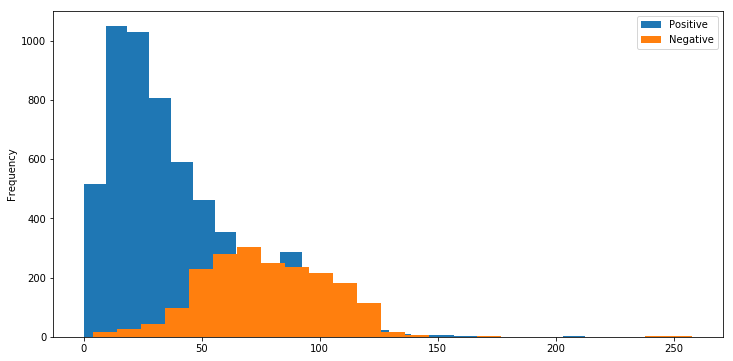

In [15]:
plt.figure(figsize=(12,6))

df[df['label'] == 'Positive']['tweet_length'].plot(kind='hist', bins=25)
df[df['label'] == 'Negative']['tweet_length'].plot(kind='hist', bins=25)

plt.legend(('Positive','Negative'))

In [16]:
#Positive tweets are longer than negative tweets

In [17]:
df['label'].value_counts()

Positive    5894
Negative    2026
Name: label, dtype: int64

In [18]:
df.drop('tweet_length', axis=1, inplace=True)

In [19]:
#checking for empty space tweets
blanks = []
for i,lb,tweet in df.itertuples():
    if type(tweet) == str:
        if tweet.isspace():
            blanks.append(i)
            
blanks

[]

In [20]:
#Checking for empty string tweets
blanks = []
for i,lb,tweet in df.itertuples():
    if type(tweet) == str:
        if tweet == '':
            blanks.append(i)
            
blanks

[442, 1678, 1834, 2509, 3661, 4153, 5157, 5330, 5908, 6220, 6340, 6596, 7294]

In [21]:
df.drop(blanks, inplace=True)

In [22]:
df['label'].value_counts()

Positive    5881
Negative    2026
Name: label, dtype: int64

In [23]:
from nltk.corpus import stopwords

In [24]:
stop_words = stopwords.words('english')

In [25]:
stop_words = ' '.join(stop_words)
stop_words

"i me my myself we our ours ourselves you you're you've you'll you'd your yours yourself yourselves he him his himself she she's her hers herself it it's its itself they them their theirs themselves what which who whom this that that'll these those am is are was were be been being have has had having do does did doing a an the and but if or because as until while of at by for with about against between into through during before after above below to from up down in out on off over under again further then once here there when where why how all any both each few more most other some such no nor not only own same so than too very s t can will just don don't should should've now d ll m o re ve y ain aren aren't couldn couldn't didn didn't doesn doesn't hadn hadn't hasn hasn't haven haven't isn isn't ma mightn mightn't mustn mustn't needn needn't shan shan't shouldn shouldn't wasn wasn't weren weren't won won't wouldn wouldn't"

In [26]:
stop_words = [char for char in stop_words if char not in string.punctuation]
stop_words = ''.join(stop_words)
stop_words

'i me my myself we our ours ourselves you youre youve youll youd your yours yourself yourselves he him his himself she shes her hers herself it its its itself they them their theirs themselves what which who whom this that thatll these those am is are was were be been being have has had having do does did doing a an the and but if or because as until while of at by for with about against between into through during before after above below to from up down in out on off over under again further then once here there when where why how all any both each few more most other some such no nor not only own same so than too very s t can will just don dont should shouldve now d ll m o re ve y ain aren arent couldn couldnt didn didnt doesn doesnt hadn hadnt hasn hasnt haven havent isn isnt ma mightn mightnt mustn mustnt needn neednt shan shant shouldn shouldnt wasn wasnt weren werent won wont wouldn wouldnt'

In [27]:
stop_words = stop_words.split()
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 'youre',
 'youve',
 'youll',
 'youd',
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 'shes',
 'her',
 'hers',
 'herself',
 'it',
 'its',
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 'thatll',
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each',
 'fe

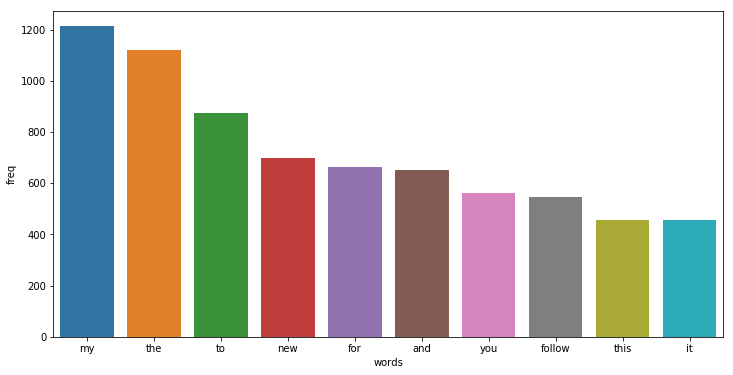

In [28]:
#Finding the most common words in the positive tweet category
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
words = cv.fit_transform(df[df['label'] == 'Positive']['tweet'])

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0,i]) for word,i in cv.vocabulary_.items()]

words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
freq = pd.DataFrame(words_freq, columns=['words','freq'])

top_10 = freq.head(10)
plt.figure(figsize=(12,6))
sns.barplot(x='words',y='freq',data=top_10)

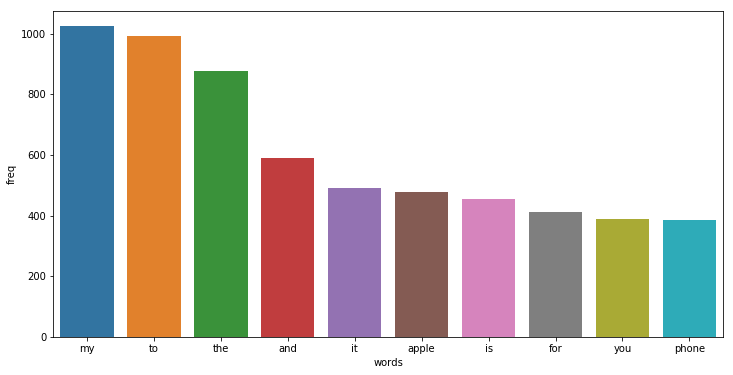

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
words = cv.fit_transform(df[df['label'] == 'Negative']['tweet'])

sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0,i]) for word,i in cv.vocabulary_.items()]

words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
freq = pd.DataFrame(words_freq, columns=['words','freq'])

top_10 = freq.head(10)
plt.figure(figsize=(12,6))
sns.barplot(x='words',y='freq',data=top_10)

In [30]:
def removing_stopwords(text):
    #Converting the string text to a list
    text = text.split()
    #Filtering the stopwords
    text = [word for word in text if word not in stop_words]
    text = ' '.join(text)
    return text

In [31]:
df['tweet'] = df['tweet'].apply(removing_stopwords)

In [32]:
#Checking for empty string tweets
blanks = []
for i,lb,tweet in df.itertuples():
    if type(tweet) == str:
        if tweet == '':
            blanks.append(i)
            
blanks

[51,
 411,
 479,
 596,
 670,
 696,
 884,
 973,
 994,
 1423,
 1707,
 1776,
 1894,
 1916,
 1984,
 1999,
 2062,
 2153,
 2557,
 3227,
 3263,
 3332,
 3391,
 3702,
 3758,
 3845,
 3859,
 3970,
 4032,
 4188,
 4574,
 4722,
 4774,
 4886,
 5289,
 5667,
 5722,
 5846,
 5941,
 5988,
 6312,
 6406,
 6463,
 6514,
 6634,
 6699,
 6846,
 7173,
 7315,
 7471,
 7475,
 7509,
 7823,
 7853]

In [33]:
df.drop(blanks, inplace=True)

In [34]:
df['label'].value_counts()

Positive    5827
Negative    2026
Name: label, dtype: int64

In [35]:
df.head()

,label,tweet
0,Positive,test
1,Positive,finally transparant silicon case thanks uncle
2,Positive,love would go
3,Positive,im wired know im george made way
4,Negative,amazing service apple even talk question unles...


In [36]:
#Splitting the data into training and testing data
X = df['tweet']
y = df['label']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [37]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [38]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

In [39]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler

In [40]:
#For oversampling
pipeline = Pipeline([
    ('Count vectorization', CountVectorizer()),
    ('Tfidf Transformation', TfidfTransformer()),
    ('Oversampling', RandomOverSampler('minority', random_state=42)),
    ('Naive Bayes Classifier', MultinomialNB())
])

In [41]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('Count vectorization', CountVectorizer()),
                ('Tfidf Transformation', TfidfTransformer()),
                ('Oversampling',
                 RandomOverSampler(random_state=42,
                                   sampling_strategy='minority')),
                ('Naive Bayes Classifier', MultinomialNB())])

In [42]:
bayes_pred = pipeline.predict(X_test)

In [43]:
pipeline_svc = Pipeline([
    ('Count vectorization', CountVectorizer()),
    ('Tfidf Transformation', TfidfTransformer()),
    ('Oversampling', RandomOverSampler('minority', random_state=42)),
    ('Linear Support Vector Classifier', LinearSVC())
])

In [44]:
pipeline_svc.fit(X_train, y_train)

Pipeline(steps=[('Count vectorization', CountVectorizer()),
                ('Tfidf Transformation', TfidfTransformer()),
                ('Oversampling',
                 RandomOverSampler(random_state=42,
                                   sampling_strategy='minority')),
                ('Linear Support Vector Classifier', LinearSVC())])

In [45]:
svc_pred = pipeline_svc.predict(X_test)

In [46]:
print(classification_report(y_test, bayes_pred))
print('\n')
print(confusion_matrix(y_test, bayes_pred))
print('\n')
print(accuracy_score(y_test, bayes_pred))

              precision    recall  f1-score   support

    Negative       0.55      0.90      0.68       640
    Positive       0.95      0.72      0.82      1716

    accuracy                           0.77      2356
   macro avg       0.75      0.81      0.75      2356
weighted avg       0.84      0.77      0.78      2356



[[ 575   65]
 [ 478 1238]]


0.7695246179966044


In [47]:
print(classification_report(y_test, svc_pred))
print('\n')
print(confusion_matrix(y_test, svc_pred))
print('\n')
print(accuracy_score(y_test, svc_pred))

              precision    recall  f1-score   support

    Negative       0.70      0.72      0.71       640
    Positive       0.90      0.88      0.89      1716

    accuracy                           0.84      2356
   macro avg       0.80      0.80      0.80      2356
weighted avg       0.84      0.84      0.84      2356



[[ 463  177]
 [ 200 1516]]


0.8399830220713073


In [48]:
#For undersampling
pipeline_under = Pipeline([
    ('Count vectorization', CountVectorizer()),
    ('Tfidf Transformation', TfidfTransformer()),
    ('Oversampling', RandomUnderSampler('majority', random_state=42)),
    ('Naive Bayes Classifier', MultinomialNB())
])

In [49]:
pipeline_under.fit(X_train, y_train)

Pipeline(steps=[('Count vectorization', CountVectorizer()),
                ('Tfidf Transformation', TfidfTransformer()),
                ('Oversampling',
                 RandomUnderSampler(random_state=42,
                                    sampling_strategy='majority')),
                ('Naive Bayes Classifier', MultinomialNB())])

In [50]:
bayes_under_pred = pipeline_under.predict(X_test)

In [51]:
pipeline_svc_under = Pipeline([
    ('Count vectorization', CountVectorizer()),
    ('Tfidf Transformation', TfidfTransformer()),
    ('Oversampling', RandomUnderSampler('majority', random_state=42)),
    ('Linear Support Vector Classifier', LinearSVC())
])

In [52]:
pipeline_svc_under.fit(X_train, y_train)

Pipeline(steps=[('Count vectorization', CountVectorizer()),
                ('Tfidf Transformation', TfidfTransformer()),
                ('Oversampling',
                 RandomUnderSampler(random_state=42,
                                    sampling_strategy='majority')),
                ('Linear Support Vector Classifier', LinearSVC())])

In [53]:
svc_under_pred = pipeline_svc_under.predict(X_test)

In [54]:
print(classification_report(y_test, bayes_under_pred))
print('\n')
print(confusion_matrix(y_test, bayes_under_pred))
print('\n')
print(accuracy_score(y_test, bayes_under_pred))

              precision    recall  f1-score   support

    Negative       0.50      0.94      0.66       640
    Positive       0.97      0.66      0.78      1716

    accuracy                           0.73      2356
   macro avg       0.73      0.80      0.72      2356
weighted avg       0.84      0.73      0.75      2356



[[ 600   40]
 [ 591 1125]]


0.7321731748726655


In [55]:
print(classification_report(y_test, svc_under_pred))
print('\n')
print(confusion_matrix(y_test, svc_under_pred))
print('\n')
print(accuracy_score(y_test, svc_under_pred))

              precision    recall  f1-score   support

    Negative       0.63      0.83      0.72       640
    Positive       0.93      0.82      0.87      1716

    accuracy                           0.82      2356
   macro avg       0.78      0.83      0.79      2356
weighted avg       0.85      0.82      0.83      2356



[[ 534  106]
 [ 315 1401]]


0.8213073005093379


In [56]:
#Usng the SMOTE Over sampling method
from imblearn.combine import SMOTETomek

pipeline_bayes_smote = Pipeline([
    ('Count vectorization', CountVectorizer()),
    ('Tfidf Transformation', TfidfTransformer()),
    ('Smote Oversampling', SMOTETomek(random_state=42)),
    ('Naive Bayes Classifier', MultinomialNB())
])

In [57]:
pipeline_bayes_smote.fit(X_train, y_train)

Pipeline(steps=[('Count vectorization', CountVectorizer()),
                ('Tfidf Transformation', TfidfTransformer()),
                ('Smote Oversampling', SMOTETomek(random_state=42)),
                ('Naive Bayes Classifier', MultinomialNB())])

In [58]:
bayes_smote_pred = pipeline_bayes_smote.predict(X_test)

In [59]:
pipeline_svc_smote = Pipeline([
    ('Count vectorization', CountVectorizer()),
    ('Tfidf Transformation', TfidfTransformer()),
    ('Smote Oversampling', SMOTETomek(random_state=42)),
    ('Linear Support Vector Classifier', LinearSVC())
])

In [60]:
pipeline_svc_smote.fit(X_train, y_train)

Pipeline(steps=[('Count vectorization', CountVectorizer()),
                ('Tfidf Transformation', TfidfTransformer()),
                ('Smote Oversampling', SMOTETomek(random_state=42)),
                ('Linear Support Vector Classifier', LinearSVC())])

In [61]:
svc_smote_pred = pipeline_svc_smote.predict(X_test)

In [62]:
print(classification_report(y_test, bayes_smote_pred))
print('\n')
print(confusion_matrix(y_test, bayes_smote_pred))
print('\n')
print(accuracy_score(y_test, bayes_smote_pred))

              precision    recall  f1-score   support

    Negative       0.54      0.90      0.68       640
    Positive       0.95      0.72      0.82      1716

    accuracy                           0.77      2356
   macro avg       0.75      0.81      0.75      2356
weighted avg       0.84      0.77      0.78      2356



[[ 575   65]
 [ 483 1233]]


0.767402376910017


In [63]:
print(classification_report(y_test, svc_smote_pred))
print('\n')
print(confusion_matrix(y_test, svc_smote_pred))
print('\n')
print(accuracy_score(y_test, svc_smote_pred))

              precision    recall  f1-score   support

    Negative       0.70      0.73      0.72       640
    Positive       0.90      0.88      0.89      1716

    accuracy                           0.84      2356
   macro avg       0.80      0.81      0.80      2356
weighted avg       0.85      0.84      0.84      2356



[[ 470  170]
 [ 199 1517]]


0.8433786078098472


In [64]:
#Linear Support Vector CLassifier under the Smote technique performed the best

In [65]:
#Using only count vectorization
svc_count_smote = Pipeline([
    ('Count vectorization', CountVectorizer()),
    ('Smote Oversampling', SMOTETomek(random_state=42)),
    ('Linear Support Vector Classifier', LinearSVC())
])

In [66]:
svc_count_smote.fit(X_train, y_train)

Pipeline(steps=[('Count vectorization', CountVectorizer()),
                ('Smote Oversampling', SMOTETomek(random_state=42)),
                ('Linear Support Vector Classifier', LinearSVC())])

In [67]:
predictions_svc = svc_count_smote.predict(X_test)

In [68]:
print(classification_report(y_test, predictions_svc))
print('\n')
print(confusion_matrix(y_test, predictions_svc))
print('\n')
print(accuracy_score(y_test, predictions_svc))

              precision    recall  f1-score   support

    Negative       0.45      0.66      0.53       640
    Positive       0.85      0.70      0.76      1716

    accuracy                           0.69      2356
   macro avg       0.65      0.68      0.65      2356
weighted avg       0.74      0.69      0.70      2356



[[ 421  219]
 [ 518 1198]]


0.6871816638370118


In [69]:
#Smote method for LinearSVC using Tfidf vectorization performed best

In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [71]:
tfidf = TfidfVectorizer()

In [72]:
train_tfidf = tfidf.fit_transform(X_train, y_train)
test_tfidf = tfidf.transform(X_test)

In [73]:
import pickle
pickle.dump(tfidf, open('transform.pkl','wb'))

In [74]:
#ALL DONE